# PROYECTO 1: DEEP LEARNING.


## ARREGLO BASE DE DATOS

**Integrante 1:** Ángela Patricia Ordoñez Castro...................................................**Código:** 201628709    
**Integrante 2:** Ricardo Medina Aponte................................................................**Código:** 200520707  
**Integrante 3:** Juan Sebastián Garcés Carranza.................................................**Código:** 201628949    
**Integrante 4:** Andrea Carolina Parra López........................................................**Código:** 201727740 



## Descripción del problema seleccionado

**SPRINGLEAF** ahora conocida como  **ONEMAIN FINANCIAL** es una empresa estadounidense que ofrece servicios financieros,  enfocados principalmente en prestamos personales, cuenta con cerca de 10 millones de clientes y alrededor de 10.000 empleados.  

En octubre de 2015 SPRINGLEAF ofrece una competencia en la plataforma Kaggle con un premio de 100.000 dólares el cual esta enfocado en la mejora de una estategia de marketing en la cual se ofrecen prestamos a través de envio de correos directos a sus clientes. 

El objetivo de la competencia consiste en a partir de una gran base de datos anonimizada, se desea predecir cuales de sus clientes responderan a una oferta hecha por correo directo, debido a la extensión de la base, el reto se enfoca en depurar y seleccionar un conjunto de variables con gran importancia que permitan a través de métodos de clasificación generar las mejores predicciones.

# Descripción de la Base de Datos:

Entre la información proporcionada por la empresa tenemos dos bases de datos, la primera corresponde a la base de entrenamiento "Train" que cuenta con 1934 columnas y 145.231 registros que corresponden a clientes, la segunda es la base de validación que cuenta con la misma cantidad de registros que el train 145.231 y 1933 variables, dado que no tiene la variable respuesta. La variable dependiente se denomina "Target" y es una variable dicotómica, donde 1 significa que es necesario enviarle un mensaje directo al cliente para ofrecer algún srvicio financiero en particulaºr y cero que no. Teniendo en cuenta que las bases de datos esta anonimizada, no es posible conocer que caracteristica mide cada columna, ni tampoco la escala de medida.

A continuación se cargan las base de datos mencionadas y se analiza la pertinencia de las variables en la base de train:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Importar bases de datos
# Train
import zipfile
with zipfile.ZipFile('Data/train.zip', 'r') as z:
    f = z.open('train.csv')
    train = pd.io.parsers.read_table(f, sep=',')

# Test
with zipfile.ZipFile('Data/test.zip', 'r') as z:
    f = z.open('test.csv')
    test = pd.io.parsers.read_table(f, sep=',')

train.head()

/Users/JUANGARCESC/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JUANGARCESC/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,9,10,11,12,43,157,167,177,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


Una breve descripción estadística de la base de train se muestra en la siguiente tabla:

In [3]:
train.describe()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,target
count,145231.000000,145231.000000,145231.000000,1.452310e+05,145175.000000,145175.00000,145175.000000,145175.000000,145175.000000,145175.000000,...,145231.000000,145231.000000,145231.000000,145231.000000,1.452310e+05,145231.000000,145231.000000,145231.000000,145231.000000,145231.000000
mean,145124.981808,105.278040,88.492285,3.721946e+03,0.693907,0.51316,0.693907,0.494493,0.476763,1.447598,...,0.549965,86.664369,89.828762,914.417259,9.904497e+08,922.938505,936.487905,9942.162279,8849.839111,0.232547
std,83890.290627,143.351237,125.903323,1.228001e+04,1.604578,1.17531,1.604578,1.115085,1.000755,1.132784,...,6.361312,31.347700,26.928221,276.361514,9.725818e+07,212.087416,210.370833,743.153332,3175.797333,0.422457
min,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,72342.500000,24.000000,13.000000,1.790000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
50%,145272.000000,60.000000,55.000000,2.500000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
75%,217686.500000,132.000000,120.000000,3.600000e+03,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
max,290463.000000,999.000000,999.000000,2.200000e+06,68.000000,66.00000,68.000000,67.000000,35.000000,39.000000,...,99.000000,99.000000,99.000000,999.000000,1.000000e+09,999.000000,999.000000,9999.000000,9999.000000,1.000000


Observamos si la variable dependiente esta balanceada.

In [4]:
# Distribución de la variable a modelar
train["target"].value_counts()/sum(train["target"].value_counts())

0    0.767453
1    0.232547
Name: target, dtype: float64

El 23.26% de los registros corresponden a la clase 1 de la variable dependiente, es decir que el cliente recibió un mensaje directo vía correo.

Por otro lado se identifican que el valor '-1' y los vacíos, corresponden a valores perdidos dentro de la base de datos, estos se reemplazan con 'nan'.

In [5]:
# Reemplazar vacíos con NA
train.replace(r' ', np.nan, regex=True, inplace = True)
train.replace(r'-1', np.nan, regex=True, inplace = True)

Se construye la variable 'NAS' que contiene el número de 'nan's' que tiene cada registro y analizamos el resumen de esta variable:

In [6]:
# Número de valores en NA por registro
train['NAS']=train.isnull().sum(axis=1)
train['NAS'].describe()

count    145231.000000
mean         28.569520
std          24.305069
min           7.000000
25%          26.000000
50%          28.000000
75%          29.000000
max         525.000000
Name: NAS, dtype: float64

Se puede observar que el 25% de los registros tiene por lo menos 26 variables con valores perdidos, el número máximo de variables en NAN es de 525, lo que corresponde apróximadamente al 27% de las variables, de acuerod con la mediana el 50% de los registros tienen mínimo 28 variables en NAN.

De acuerdo con esta información se decide eliminar los registros que tienen más de 100 variables como valores perdidos, lo que corresponde aproximadamente al 5% de las variables de la base.

In [7]:
# Eliminar registros que tienen más de 100 variables en NA
train2=train[train['NAS']<100]
train2['NAS'].describe()

count    144277.000000
mean         26.657478
std           3.588183
min           7.000000
25%          26.000000
50%          28.000000
75%          29.000000
max          82.000000
Name: NAS, dtype: float64

Eliminar la variable construida para contar el número de NA's para cada registro.

In [8]:
del train2['NAS']

Algunas variables tienen un mismo valor para la mayoría de los registros, por lo tanto aquellas variables que tengan más de 95% de los registros con un mismo valor, no son tenidas en cuenta. Con la siguiente función se genera un vector que contiene 'na' para la variable que tiene el mismo valor en la mayoría de registros y 1 en otro caso:

In [9]:
list3=[1]
for i in range(1,train2.shape[1]):
    if train2.iloc[:,i].isnull().sum() != train2.shape[0]:
        if max(train2.iloc[:,i].value_counts(normalize=True))<0.95:
            list3.append(1)
        else: list3.append(np.nan)
    else: list3.append(np.nan)

A continuación se construye un nuevo vector, que resulta de la multiplicación entre el vector anterior y el nombre de las variables de la base:

In [10]:
# Convertir el vector en un array
list3=np.asarray(list3)

# Crear un array con el index de las varibles
var=np.asarray(np.arange(0,train2.shape[1],1))

# Multiplicar los dos array y eliminar los NAS para dejar solo lel index de as variables necesarias
var=list3 * var
var = var[~np.isnan(var)]

Con este vector podemos generar una nueva base, excluyendo estas variables:

In [11]:
# Nueva base de datos solo con las variables seleccionadas
train3=train2.iloc[:,var]

Para evitar multicolinealidad en los modelos, se excluyen las variables con correlaciones altas, para esto construimos la matriz de correlaciones con el siguiente código:

In [12]:
# Calcular matriz de correlaciones
corr=train3.iloc[:,1:1662].corr().abs()

Con la matriz de correlaciones es posible construir un mapa de calor y así se analiza graficamente las correlaciones entre las variables:

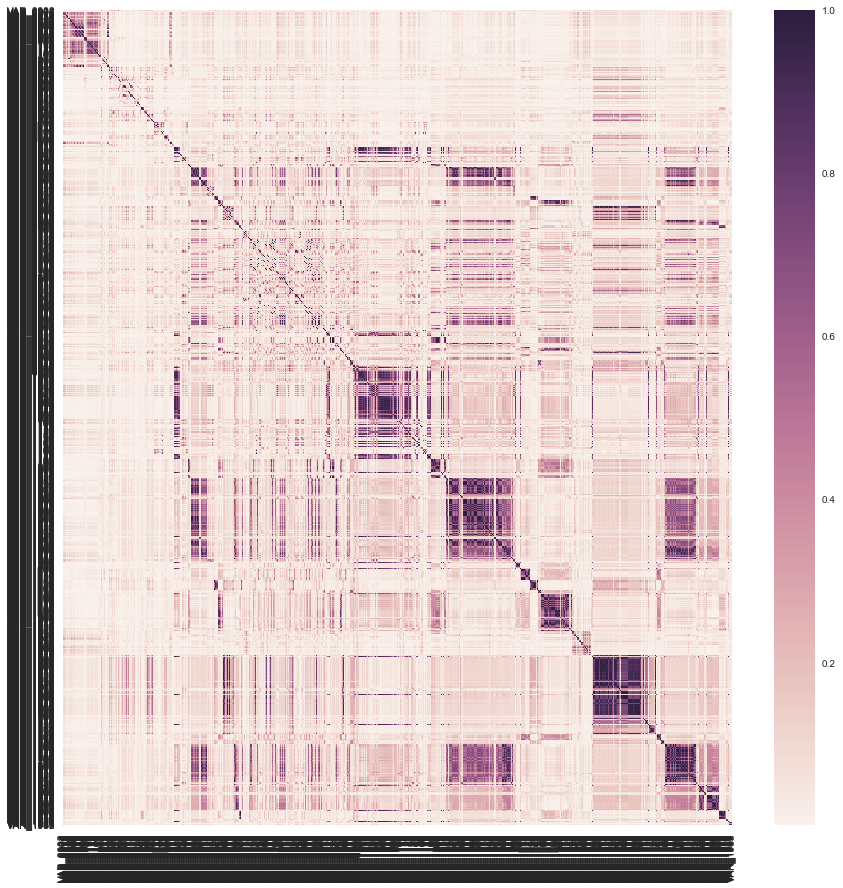

In [13]:
# Plot de un mapa de calor con las correlaciones
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr)
plt.show()

Las casillas oscuras tienen una correlación alta, es necesario quitarlas de la base Train. Las variables con más del 80% de correlación se identifican en el vector 'to_drop':

In [14]:
# Seleccionar la parte superior de la matriz de correlaciones
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Las sigueitnes variables tienen una correlación superior al 95%
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

Como se observa, solo se selecciona la parte triangular superior de la matriz de correlaciones, con esto solo se elimina una de las dos variables que  entre si tienen correlación alta. Con el siguiente comando quitamos estas variables de la base de datos:

In [15]:
# Crear una nueva base de datos eliminando las variables con alta correlación
train4=train3.drop(to_drop, axis=1)

Con esto tenemos una base con 144.277 y 459 variables, lo que disminuye en gran medida el numero de variables:

In [16]:
train4.shape

(144277, 459)

Además es posible eliminar aquellas variables que registran más del 80% de valores perdidos:

In [17]:
train4=train4[[c for c in train4 if (train4[c].isnull().sum()/train4.shape[0]) < 0.8]]

Con esto quedamos con 440 variables:

In [18]:
train4.shape

(144277, 440)

Hasta ahora nos hemos enfocado en las variables númericas, sin embargo la base contiene otro tipo de variables, para analizar las variables que son categoricas hacemos:

In [19]:
# Analizando las variables que no son númericas dentro de la base de datos...
train4.select_dtypes(include=['object']).head()

,VAR_0001,VAR_0005,VAR_0073,VAR_0075,VAR_0200,VAR_0204,VAR_0217,VAR_0232,VAR_0237,VAR_0274,VAR_0283,VAR_0305,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_1934
0,H,C,NaN,08NOV11:00:00:00,NaN,29JAN14:21:16:00,08NOV11:02:00:00,True,FL,FL,S,S,NaN,CF,O,U,O,IAPS
1,H,B,04SEP12:00:00:00,10NOV11:00:00:00,SANTEE,01FEB14:00:11:00,02OCT12:02:00:00,False,CA,MI,S,S,H,EC,O,R,R,IAPS
2,H,C,NaN,13DEC11:00:00:00,REEDSVILLE,30JAN14:15:11:00,13DEC11:02:00:00,True,WV,WV,S,P,R,UU,R,R,NaN,IAPS
3,H,C,NaN,23SEP10:00:00:00,LIBERTY,01FEB14:00:07:00,01NOV12:02:00:00,False,TX,TX,S,P,H,NaN,R,R,NaN,RCC
4,R,N,NaN,15OCT11:00:00:00,FRANKFORT,29JAN14:19:31:00,15OCT11:02:00:00,True,IL,IL,S,P,S,NaN,R,U,O,BRANCH


Basados en el encabezado de los datos podemos tomar algunas decisiones, por ejemplo: Se eliminan las variables que registran las fechas, pues por su naturaleza no es conveniente incluirlas en el modelo, así mismo la ciudad tampoco se tiene en cuenta pues tiene una cantidad de categorias muy amplia y solo tendremos en cuenta una de las variables que registran el estado (la más completa).

In [20]:
# Se eliminan las variables de fecha para evitar que hagan ruido en los modelos, también se elimina 
# la ciudad ('VAR_0200') por el número de categorías, a cambio se deja el estado (solo una):
to_drop2=['VAR_0073', 'VAR_0075', 'VAR_0200', 'VAR_0204', 'VAR_0217', 'VAR_0274']
train4=train4.drop(to_drop2, axis=1)

Se dismunuyó la cantidad de variables considerablemente, ahora es posible hacer imputación de los valores perdidos dependiendo del tipo de variable, dentro de la base encontramos los siguientes tipos de variables:

In [21]:
train4.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

Para hacer la imputación de datos empleamos la siguiente función, que tiene en cuenta el tipo de variable. Para las variables que son númericas ('float' o 'int') imputa la media y para las variables categoricas ('Object') imputa la moda.

In [23]:
# Para imputar NAN dependiendo el tipo de variable

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

train4 = DataFrameImputer().fit_transform(train4)

Así tenemos una base con más fácil de manejar, con menos de dimensionalidad y más confiable a la hora de hacer predicciones.

In [24]:
# Guardar la base de datos train4:
train4.to_csv('Data/Train4.csv', sep=',')

Es posible modificar la base de test, a partir de la información de la base train, para disminuir su tamaño y que sea más fácil su tratamiento a la hora de hacer predicciones. Para esto seleccionamos las mismas variables que resultaron que se tendrán en cuenta de la base train y se imputan los valores perdidos dependiendo del tipo de variable.

In [ ]:
# Preparar la base de test:
test2=test[list(train4)[:433]]

In [ ]:
# Para imputar NAN dependiendo el tipo de variable en la base de test
test2 = DataFrameImputer().fit_transform(test2)

In [ ]:
test2.head()

In [ ]:
# Guardar la base de datos train4:
test2.to_csv('Data/Test2.csv', sep=',')